# Battle of Neighborhood

## Introduction

This final project explores the best locations for Indian restaurants throughout the city of New York. Food Business News stated that worldwide pasta sales were up for the second year in a row with the United Sates holding the largest market (Donley, 2018). New York is a major metropolitan area with more than 8.4 million (Quick Facts, 2018) people living within city limits. The history and the way of life of New York Indians was profoundly affected by newcomers to the area. The indigenous people had occupied the land thousands of years before the first European explorers arrived. The Europeans brought with them new ideas, customs, religions, weapons, transport (the horse and the wheel), livestock (cattle and sheep) and disease which profoundly affected the history of the Native Indians. With almost 400,000 inhabitants reporting Indian ancestry, the need to find and enjoy Indian cuisine is on the rise. This report explores which neighborhoods and boroughs of New York City have the most as well as the best Indian restaurants. Additionally, I will attempt to answer the questions “Where should I open an Indian Restaurant?” and “Where should I stay If I want great Indian food?”

## Problem Statement

This Project answers the three main questions for the Indians in New York
1. What is / are the best location(s) for Indian cuisine in New York City? 
2. In what Neighborhood and/or borough should I open an Indian restaurant to have the best chance of being successful? 
3. Where would I go in New York City to have the best Indian food?

## Data

In order to answer the above questions, data on New York City neighborhoods, boroughs to include boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.
New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/new_york_dataset
New York City data containing neighborhood boundaries will be obtained from the data source: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
All data related to locations and quality of Italian restaurants will be obtained via the FourSquare API utilized via the Request library in Python.


### Import all the required Libraries

In [20]:
import pandas as pd
import numpy as np
import requests
import json
import csv
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

#### Initialize API Credentials

In [21]:
CLIENT_ID = "Q0I22GOSO21HDHF11UPP3I4VOJ0MCI101OX0VFWOJNSZRWUO"  #Private Data
CLIENT_SECRET= "ZBDPPRIYDKXR0XHEHEKJOYVC32RIFCFV0PLPOU4FORGKPEQ0" #Private Data
VERSION = "20200503"

#### Define Functions for easy and multiple  access of data from Foursquare API calls

In [22]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [23]:
url = 'https://cocl.us/new_york_dataset'
try:
    r = requests.get(url).json()
except Exception as e:
    pass

In [24]:
ny_data = get_new_york_data()

column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    try:
        Borough, Neighborhood, Latitude, Longitude=row
        venues = get_venues(Latitude,Longitude)
        indian_resturants=venues[venues['Category']=='Indian Restaurant']   
        for resturant_detail in indian_resturants.values.tolist():
            id, name , category=resturant_detail
            indian_rest_ny = indian_rest_ny.append({'Borough': Borough,  'Neighborhood': Neighborhood,  'ID': id, 'Name' : name}, ignore_index=True)
        count+=1
        
    except Exception as e:
        pass


### Convert to CSV file as the API calls are limited for Free Account in FourSquare

In [25]:
indian_rest_ny.to_csv('indian_rest_ny_csv1.csv')

#### Dataframe contains all the Indian  Restuarant in New york 

In [26]:
indian_rest_ny = pd.read_csv('indian_rest_ny_csv1.csv')
indian_rest_ny

,Unnamed: 0,Borough,Neighborhood,ID,Name
0,0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill
3,3,Brooklyn,Greenpoint,51a5445c498ee0f182370cb2,Agra Taj Mahal
4,4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights
5,5,Brooklyn,Brooklyn Heights,4b8ffc16f964a520246e33e3,Curry Heights
6,6,Brooklyn,Gowanus,52f18573498ec2c34e830ffd,Kanan's Indian Restaurant
7,7,Brooklyn,Fort Greene,57596dad498e732300496b23,Dosa Royale
8,8,Brooklyn,Clinton Hill,568d3902498e619efcbc3f58,Spice & Grill
9,9,Brooklyn,Clinton Hill,4ace7c86f964a520d3d020e3,Kinara's


In [27]:
indian_rest_ny.shape

(29, 5)

In [28]:
indian_rest_ny[indian_rest_ny['Borough']=='Brooklyn']


,Unnamed: 0,Borough,Neighborhood,ID,Name
2,2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill
3,3,Brooklyn,Greenpoint,51a5445c498ee0f182370cb2,Agra Taj Mahal
4,4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights
5,5,Brooklyn,Brooklyn Heights,4b8ffc16f964a520246e33e3,Curry Heights
6,6,Brooklyn,Gowanus,52f18573498ec2c34e830ffd,Kanan's Indian Restaurant
7,7,Brooklyn,Fort Greene,57596dad498e732300496b23,Dosa Royale
8,8,Brooklyn,Clinton Hill,568d3902498e619efcbc3f58,Spice & Grill
9,9,Brooklyn,Clinton Hill,4ace7c86f964a520d3d020e3,Kinara's
10,10,Brooklyn,Boerum Hill,543870ec498ec64de510608d,Masala Grill
11,11,Brooklyn,Prospect Lefferts Gardens,4bb93b70cf2fc9b6fe64a002,Gandhi Fine Indian Cuisine


In [48]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in indian_rest_ny.values.tolist():
    Borough, Neighborhood, ID, Name=row[1:]
    try:
        venue_details=get_venue_details(ID)
        
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
indian_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '5eaf7ceda2e538001b6a9671'}, 'response': {'venue': {'id': '4c0448d9310fc9b6bf1dc761', 'name': 'Curry Spot', 'contact': {'phone': '7187085900', 'formattedPhone': '(718) 708-5900'}, 'location': {'address': '4268 Katonah Ave', 'crossStreet': 'E 235 Street', 'lat': 40.897624941880906, 'lng': -73.86714729157393, 'labeledLatLngs': [{'label': 'display', 'lat': 40.897624941880906, 'lng': -73.86714729157393}, {'label': 'entrance', 'lat': 40.897709, 'lng': -73.86707}], 'postalCode': '10470', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4268 Katonah Ave (E 235 Street)', 'Bronx, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/curry-spot/4c0448d9310fc9b6bf1dc761', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 

{'meta': {'code': 200, 'requestId': '5eaf7cb698205d001b398a94'}, 'response': {'venue': {'id': '545835a1498e820edc6f636f', 'name': 'Bombay Grill', 'contact': {'phone': '7184912500', 'formattedPhone': '(718) 491-2500'}, 'location': {'address': '8716 3rd Ave', 'lat': 40.622371, 'lng': -74.03179899999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.622371, 'lng': -74.03179899999999}, {'label': 'entrance', 'lat': 40.622344, 'lng': -74.031673}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8716 3rd Ave', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bombay-grill/545835a1498e820edc6f636f', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4

{'meta': {'code': 200, 'requestId': '5eaf7e0c77af03001bb1936e'}, 'response': {'venue': {'id': '5169f5c4e4b0c7fcb77a0f3c', 'name': 'Agra Heights', 'contact': {'phone': '7184435700', 'formattedPhone': '(718) 443-5700'}, 'location': {'address': '226 Wilson Ave', 'crossStreet': 'btwn Harman & Himrod St', 'lat': 40.698094445626104, 'lng': -73.92135507234042, 'labeledLatLngs': [{'label': 'display', 'lat': 40.698094445626104, 'lng': -73.92135507234042}, {'label': 'entrance', 'lat': 40.698115, 'lng': -73.921387}], 'postalCode': '11237', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['226 Wilson Ave (btwn Harman & Himrod St)', 'Brooklyn, NY 11237', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/agra-heights/5169f5c4e4b0c7fcb77a0f3c', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/

{'meta': {'code': 200, 'requestId': '5eaf7d620cc1fd001be7226d'}, 'response': {'venue': {'id': '4b8ffc16f964a520246e33e3', 'name': 'Curry Heights', 'contact': {'phone': '7182609000', 'formattedPhone': '(718) 260-9000', 'twitter': 'curryheights'}, 'location': {'address': '151 Remsen St', 'crossStreet': 'btwn Court St & Clinton St', 'lat': 40.69357223828141, 'lng': -73.99226545349896, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69357223828141, 'lng': -73.99226545349896}, {'label': 'entrance', 'lat': 40.693578, 'lng': -73.992235}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['151 Remsen St (btwn Court St & Clinton St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/curry-heights/4b8ffc16f964a520246e33e3', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4

{'meta': {'code': 200, 'requestId': '5eaf7cb11d67cb001b4767eb'}, 'response': {'venue': {'id': '52f18573498ec2c34e830ffd', 'name': "Kanan's Indian Restaurant", 'contact': {'phone': '7183693777', 'formattedPhone': '(718) 369-3777'}, 'location': {'address': '452 3rd Ave', 'crossStreet': '9th Street', 'lat': 40.671890999999995, 'lng': -73.99094000000001, 'labeledLatLngs': [{'label': 'display', 'lat': 40.671890999999995, 'lng': -73.99094000000001}, {'label': 'entrance', 'lat': 40.671842, 'lng': -73.990867}], 'postalCode': '11215', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['452 3rd Ave (9th Street)', 'Brooklyn, NY 11215', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kanans-indian-restaurant/52f18573498ec2c34e830ffd', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_

{'meta': {'code': 200, 'requestId': '5eaf7cdab4b684001bf35219'}, 'response': {'venue': {'id': '57596dad498e732300496b23', 'name': 'Dosa Royale', 'contact': {'phone': '7185763800', 'formattedPhone': '(718) 576-3800'}, 'location': {'address': '258 Dekalb Ave', 'lat': 40.689466368706604, 'lng': -73.96870434089776, 'labeledLatLngs': [{'label': 'display', 'lat': 40.689466368706604, 'lng': -73.96870434089776}], 'postalCode': '11205', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['258 Dekalb Ave', 'New York, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dosa-royale/57596dad498e732300496b23', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 22}, 'url': 'http://www.dosaroyale.com', 

{'meta': {'code': 200, 'requestId': '5eaf7d1fe826ac001b0d495d'}, 'response': {'venue': {'id': '568d3902498e619efcbc3f58', 'name': 'Spice & Grill', 'contact': {}, 'location': {'address': '441 Myrtle Ave', 'crossStreet': 'Waverly', 'lat': 40.693389, 'lng': -73.968028, 'labeledLatLngs': [{'label': 'display', 'lat': 40.693389, 'lng': -73.968028}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['441 Myrtle Ave (Waverly)', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/spice--grill/568d3902498e619efcbc3f58', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 20, 'gro

{'meta': {'code': 200, 'requestId': '5eaf7da6edbcad001ba9deb0'}, 'response': {'venue': {'id': '543870ec498ec64de510608d', 'name': 'Masala Grill', 'contact': {}, 'location': {'address': 'Atlantic Avenue', 'crossStreet': '3rd Avenue', 'lat': 40.68554017378092, 'lng': -73.98120188318653, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68554017378092, 'lng': -73.98120188318653}], 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Atlantic Avenue (3rd Avenue)', 'Brooklyn, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/masala-grill/543870ec498ec64de510608d', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 14}, 'url': 'http://masalagrillbk.com', 'price': {'tie

{'meta': {'code': 200, 'requestId': '5eaf7ca595feaf001c134e98'}, 'response': {'venue': {'id': '4bb93b70cf2fc9b6fe64a002', 'name': 'Gandhi Fine Indian Cuisine', 'contact': {'phone': '7182827012', 'formattedPhone': '(718) 282-7012'}, 'location': {'address': '2032 Bedford Ave', 'crossStreet': 'btwn Clarkson Ave & Parkside Ave', 'lat': 40.65516762218564, 'lng': -73.95632450081226, 'labeledLatLngs': [{'label': 'display', 'lat': 40.65516762218564, 'lng': -73.95632450081226}], 'postalCode': '11226', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2032 Bedford Ave (btwn Clarkson Ave & Parkside Ave)', 'Brooklyn, NY 11226', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/gandhi-fine-indian-cuisine/4bb93b70cf2fc9b6fe64a002', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 's

{'meta': {'code': 200, 'requestId': '5eaf7c5ebae9a2001bc5e072'}, 'response': {'venue': {'id': '4ae7876ef964a5201eac21e3', 'name': 'Kismat Indian Restaurant', 'contact': {'phone': '2127958633', 'formattedPhone': '(212) 795-8633', 'twitter': 'kismatindian'}, 'location': {'address': '603 Fort Washington Ave', 'crossStreet': '187th St', 'lat': 40.855221723964846, 'lng': -73.93696683600031, 'labeledLatLngs': [{'label': 'display', 'lat': 40.855221723964846, 'lng': -73.93696683600031}], 'postalCode': '10040', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['603 Fort Washington Ave (187th St)', 'New York, NY 10040', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kismat-indian-restaurant/4ae7876ef964a5201eac21e3', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '

{'meta': {'code': 200, 'requestId': '5eaf7dcd0de0d9001b72d238'}, 'response': {'venue': {'id': '54c2bd96498eaf5142e3fe92', 'name': 'Clove Indian Restaurant & Bar', 'contact': {'phone': '6469186644', 'formattedPhone': '(646) 918-6644', 'twitter': 'cloveindian'}, 'location': {'address': '1592 Amsterdam Ave', 'crossStreet': 'btwn 139th St & 138th St', 'lat': 40.82128, 'lng': -73.95062, 'labeledLatLngs': [{'label': 'display', 'lat': 40.82128, 'lng': -73.95062}, {'label': 'entrance', 'lat': 40.821289, 'lng': -73.950696}], 'postalCode': '10031', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1592 Amsterdam Ave (btwn 139th St & 138th St)', 'New York, NY 10031', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/clove-indian-restaurant--bar/54c2bd96498eaf5142e3fe92', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4

{'meta': {'code': 200, 'requestId': '5eaf7df4f7706a001b539ce4'}, 'response': {'venue': {'id': '529d382a11d2dd5ef107e641', 'name': 'Chapati House - NYC', 'contact': {'phone': '2127497200', 'formattedPhone': '(212) 749-7200', 'twitter': 'chapatihousenyc'}, 'location': {'address': '3153 Broadway', 'crossStreet': 'Tiemann Pl.', 'lat': 40.81457249971737, 'lng': -73.95915381671377, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81457249971737, 'lng': -73.95915381671377}], 'postalCode': '10027', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3153 Broadway (Tiemann Pl.)', 'New York, NY 10027', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/chapati-house--nyc/529d382a11d2dd5ef107e641', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}

{'meta': {'code': 200, 'requestId': '5eaf7cf9a2e538001b6ab162'}, 'response': {'venue': {'id': '4e221f671495f18f035610f6', 'name': 'Mumtaz', 'contact': {'phone': '2128794797', 'formattedPhone': '(212) 879-4797'}, 'location': {'address': '1582 York Ave', 'lat': 40.7741338, 'lng': -73.9482272, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7741338, 'lng': -73.9482272}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1582 York Ave', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mumtaz/4e221f671495f18f035610f6', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 11}, 'url': 'http://mumtaznyc.com', 'price': {'tier': 2, 'message': 'Moderate', 'cu

{'meta': {'code': 200, 'requestId': '5eaf7cc271c428001b1a2fee'}, 'response': {'venue': {'id': '4b4aab62f964a520978c26e3', 'name': 'Dil-e Punjab Deli', 'contact': {'phone': '2126479428', 'formattedPhone': '(212) 647-9428', 'twitter': 'dilepunjabdeli'}, 'location': {'address': '170 9th Ave', 'crossStreet': 'at 21st St', 'lat': 40.74484451009235, 'lng': -74.00252750283143, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74484451009235, 'lng': -74.00252750283143}, {'label': 'entrance', 'lat': 40.744917, 'lng': -74.002266}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['170 9th Ave (at 21st St)', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dile-punjab-deli/4b4aab62f964a520978c26e3', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/f

{'meta': {'code': 200, 'requestId': '5eaf7d8ead1ab4001b1643c4'}, 'response': {'venue': {'id': '4bbb9dbded7776b0e1ad3e51', 'name': 'Tamarind TriBeCa', 'contact': {'phone': '2127759000', 'formattedPhone': '(212) 775-9000', 'facebook': '201503306550753', 'facebookName': 'Tamarind Tribeca'}, 'location': {'address': '99 Hudson St', 'crossStreet': 'at Franklin St', 'lat': 40.71921117375622, 'lng': -74.00872657957527, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71921117375622, 'lng': -74.00872657957527}, {'label': 'entrance', 'lat': 40.719084, 'lng': -74.008899}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['99 Hudson St (at Franklin St)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tamarind-tribeca/4bbb9dbded7776b0e1ad3e51', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'pre

{'meta': {'code': 200, 'requestId': '5eaf7cd21d67cb001b47aebb'}, 'response': {'venue': {'id': '5782c9ce498edde587f5aa14', 'name': 'Tikka Indian Grill', 'contact': {'phone': '7184801307', 'formattedPhone': '(718) 480-1307'}, 'location': {'address': '119-30 Metropolitan Ave', 'lat': 40.70587364181698, 'lng': -73.83094233462995, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70587364181698, 'lng': -73.83094233462995}], 'postalCode': '11415', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['119-30 Metropolitan Ave', 'Queens, NY 11415', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tikka-indian-grill/5782c9ce498edde587f5aa14', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 2}, 'url': 'http

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5eaf7d709388d7001b493fc5'}, 'response': {}}


KeyError: 'venue'

## Indian Restuarants Stats in NYC

In [30]:
indian_rest_stats_ny

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.8,10
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.0,2
2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill,14,7.1,4
3,Brooklyn,Greenpoint,51a5445c498ee0f182370cb2,Agra Taj Mahal,34,7.3,16
4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights,12,5.6,5
5,Brooklyn,Brooklyn Heights,4b8ffc16f964a520246e33e3,Curry Heights,31,6.9,17
6,Brooklyn,Gowanus,52f18573498ec2c34e830ffd,Kanan's Indian Restaurant,24,7.9,8
7,Brooklyn,Fort Greene,57596dad498e732300496b23,Dosa Royale,75,8.8,22
8,Brooklyn,Clinton Hill,568d3902498e619efcbc3f58,Spice & Grill,20,7.5,6
9,Brooklyn,Clinton Hill,4ace7c86f964a520d3d020e3,Kinara's,9,5.7,20


In [31]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny_csv.csv')

In [32]:
indian_rest_stats_ny.shape


(29, 7)

In [33]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       29 non-null     object 
 1   Neighborhood  29 non-null     object 
 2   ID            29 non-null     object 
 3   Name          29 non-null     object 
 4   Likes         29 non-null     object 
 5   Rating        29 non-null     float64
 6   Tips          29 non-null     object 
dtypes: float64(1), object(6)
memory usage: 992.0+ bytes


In [34]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       29 non-null     object 
 1   Neighborhood  29 non-null     object 
 2   ID            29 non-null     object 
 3   Name          29 non-null     object 
 4   Likes         29 non-null     float64
 5   Rating        29 non-null     float64
 6   Tips          29 non-null     float64
dtypes: float64(3), object(4)
memory usage: 1.2+ KB


In [35]:
indian_rest_stats_ny.describe()


,Likes,Rating,Tips
count,29.000000,29.000000,29.000000
mean,104.965517,7.382759,33.655172
std,212.546211,1.679938,56.341608
min,0.000000,0.000000,0.000000
25%,12.000000,7.300000,6.000000
50%,29.000000,7.800000,14.000000
75%,73.000000,8.300000,22.000000
max,834.000000,8.800000,259.000000


In [36]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]


Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                834
Rating                               8.4
Tips                                 259
Name: 16, dtype: object

In [37]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]


Borough                         Brooklyn
Neighborhood                 Fort Greene
ID              57596dad498e732300496b23
Name                         Dosa Royale
Likes                                 75
Rating                               8.8
Tips                                  22
Name: 7, dtype: object

In [38]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]


Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                834
Rating                               8.4
Tips                                 259
Name: 16, dtype: object

In [39]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
9,Fort Greene,8.8
6,Chelsea,8.8
19,Prospect Lefferts Gardens,8.7
23,Tribeca,8.6
22,Sutton Place,8.5
8,Flatiron,8.4
17,Midtown,8.4
18,New Dorp,8.3
1,Bayside,8.2
25,Washington Heights,8.0


In [40]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.20
3,Queens,7.45
1,Brooklyn,7.35
0,Bronx,6.90
4,Staten Island,4.15


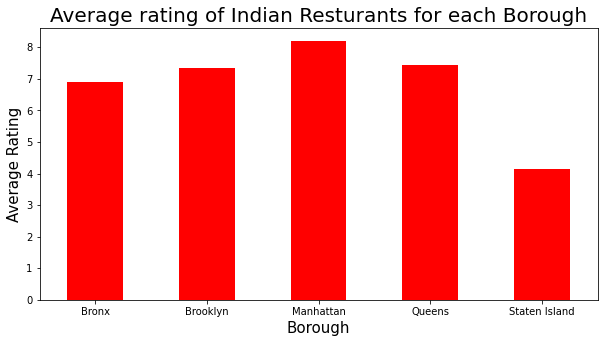

In [41]:
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5), color='r')
plt.title('Average rating of Indian Resturants for each Borough', fontsize=20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

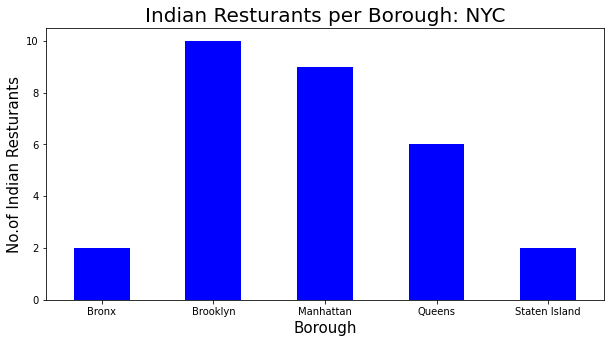

In [42]:
indian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = 'b')
plt.title('Indian Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

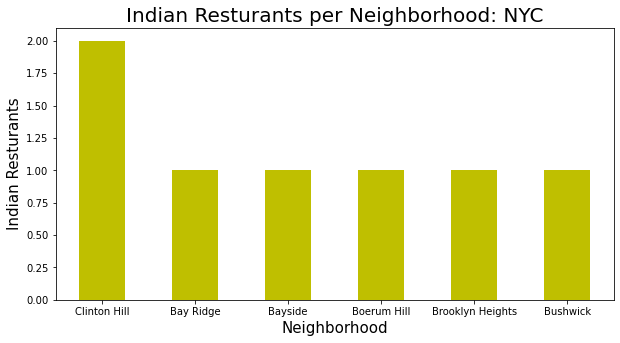

In [43]:
NOofNeigh = 6 # top number for graphing all the same past 6
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color='y')
plt.title('Indian Resturants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [44]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
1,Bayside,8.2
2,Boerum Hill,8.0
6,Chelsea,8.8
8,Flatiron,8.4
9,Fort Greene,8.8
17,Midtown,8.4
18,New Dorp,8.3
19,Prospect Lefferts Gardens,8.7
22,Sutton Place,8.5
23,Tribeca,8.6


## Location of Indian Restaurants with Good Average Rating

In [45]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Bayside,40.766041,-73.774274,8.2
1,Brooklyn,Boerum Hill,40.685683,-73.983748,8.0
2,Manhattan,Chelsea,40.744035,-74.003116,8.8
3,Staten Island,Chelsea,40.594726,-74.189560,8.8
4,Manhattan,Flatiron,40.739673,-73.990947,8.4
5,Brooklyn,Fort Greene,40.688527,-73.972906,8.8
6,Manhattan,Midtown,40.754691,-73.981669,8.4
7,Staten Island,New Dorp,40.572572,-74.116479,8.3
8,Brooklyn,Prospect Lefferts Gardens,40.658420,-73.954899,8.7
9,Manhattan,Sutton Place,40.760280,-73.963556,8.5


In [46]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [47]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)